# Pymaceuticals Inc.
---

### Analysis
Step 1-Prepare the data
- identify the common data element of the two dataset(df.columns methods/function)mouse ID is the common data element
- join or merge mouse data and study result data
- Display the number of unique mice IDs in the data


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

#Display the data table for preview
mouse_data_complete.head(5)
#mouse_metadata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
number_of_mice=mouse_data_complete['Mouse ID'].nunique()
number_of_mice

249

In [4]:
#First identify number of duplicates
number_of_duplicates=len(mouse_data_complete)-len(mouse_data_complete.drop_duplicates())
number_of_duplicates

1

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_data_complete[mouse_data_complete.duplicated(["Mouse ID","Timepoint"])]
duplicate_mouse["Mouse ID"].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse=mouse_data_complete.loc[mouse_data_complete["Mouse ID"]==str(duplicate_mouse.iloc[0,0]),:]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data_complete.loc[mouse_data_complete['Mouse ID']!='g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_df = clean_df.groupby('Drug Regimen')
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_var = summary_df['Tumor Volume (mm3)'].var()
tumor_std = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_regimen_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_var,
                                  'Standard Deviation': tumor_std, 'SEM': tumor_sem
                                  })
#summary_regimen_df
summary_regimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg_data=summary_df.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"],})
summary_agg_data.head(10)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
#apply clean data for drug regimen and its data points using value_counts methods before generating bar plot
drug_regimen_count = clean_df['Drug Regimen'].value_counts()
drug_regimen_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

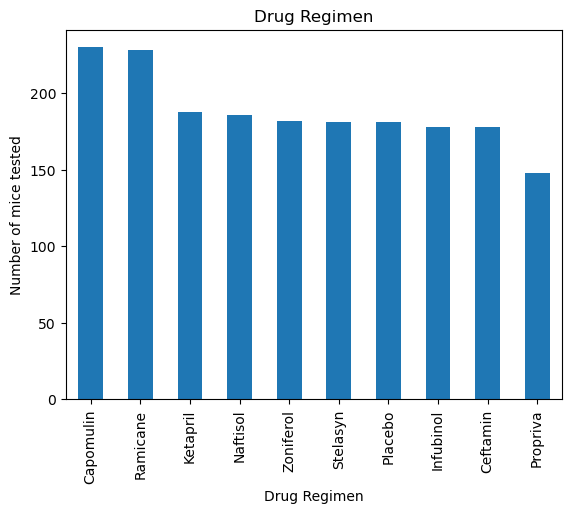

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = drug_regimen_count.plot(kind='bar', width=0.5)
#labeling for X & Y axis and title
# Set the x_axis to the length of the 'counts' series
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of mice tested")
bar_plot.set_title("Drug Regimen")
# Present the bar chart
plt.show()


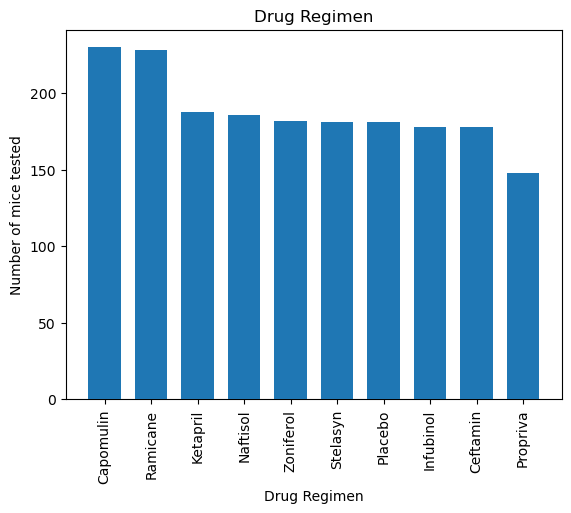

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drug_regimen_count.index.values, drug_regimen_count.values, width=0.7, zorder=3)
plt.xticks(rotation="vertical")
#x_axis to the length of the 'drug_regimen_count'
x_axis = np.arange(len(drug_regimen_count))
plt.bar(x_axis, drug_regimen_count, width = 0.7)
#tick marks based on the index values in the 'drug_regimen_count'
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen_count.index.values)
# tick marks rotation 90 degrees 
plt.xticks(rotation=90)
# Labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
plt.title("Drug Regimen")
# Print plot
plt.show()

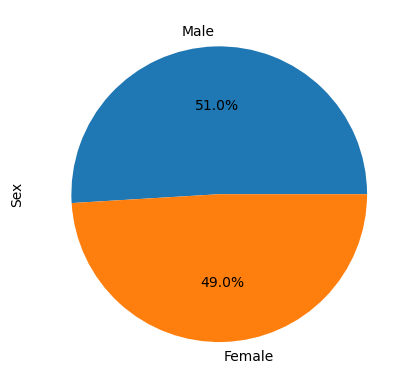

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_num = clean_df['Sex'].value_counts()
sex_num.plot(kind="pie", autopct="%1.1f%%")
plt.show()

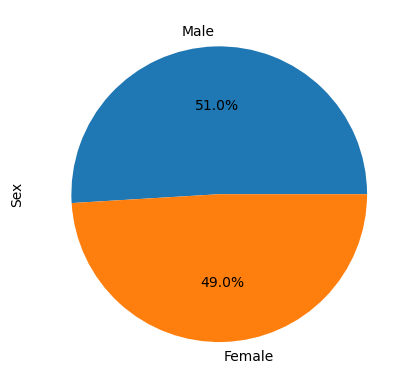

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_num.values, labels=sex_num.index.values,autopct="%1.1f%%")
plt.ylabel('Sex') 
plt.show()

## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Create subset dataframe for the following drug regimens:Capomulin, Ramicane, Infubinol, and Ceftamin and create a variable list to grab the drug volume
# Loop through in the orginal dataframe to locate the drug from  list 
# Start by getting the last (greatest) timepoint for each mouse
#groupby or indexing the data by mouse ID and timepoint

greatest_timepoint = pd.DataFrame(mouse_data_complete.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
greatest_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(mouse_data_complete, greatest_timepoint, on='Mouse ID')
merged_data.head()       
                 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [119]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[] 

for drug in drug_regimen:
    #Locate the rows which contain mice on each drug and get the tumor volumes
    #tumor_per_drug = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_per_drug = merged_data[merged_data['Drug Regimen'] == drug]
    #tumor_vol.append(tumor_per_drug )
    
    #add subset 
    #final_volume_df = tumor_per_drug.loc[tumor_per_drug['Timepoint'] == tumor_per_drug['max_timepoint']]
    final_tumor_vol = tumor_per_drug.loc[tumor_per_drug['Timepoint'] == tumor_per_drug['max_timepoint']]

    values = final_tumor_vol['Tumor Volume (mm3)']
    tumor_vol.append(values)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
      
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
     
    # Determine outliers using upper and lower bounds
    outliers = (values.loc[(final_tumor_vol['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_tumor_vol['Tumor Volume (mm3)'] <= lower_bound)]).count()
    #outliers = (tumor_per_drug.loc[(tumor_per_drug ['Tumor Volume (mm3)'] >= upper_bound) | 
    #(tumor_per_drug ['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f"{drug} 's potential outliers is: {outliers}")
        

Capomulin 's potential outliers is: 0
Ramicane 's potential outliers is: 0
Infubinol 's potential outliers is: 1
Ceftamin 's potential outliers is: 0


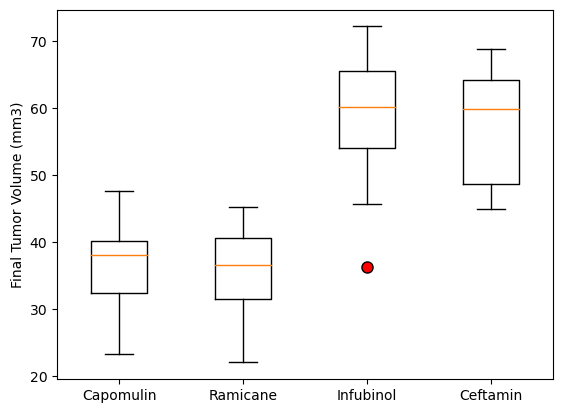

In [75]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
plt.boxplot(tumor_vol, flierprops=flierprops)

# Add title and labels to boxplot
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()


In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#First create a dataframe for Capomul Regimen only
Capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
#Specificaly the analysis required for the mouse ID 'l509'
mouse_id = 'l509'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


## Line and Scatter Plots

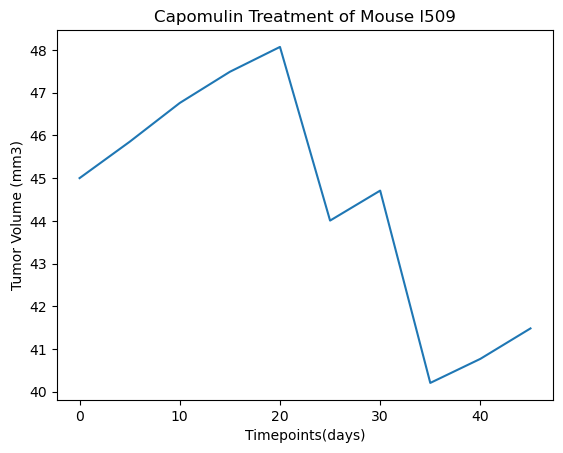

In [20]:
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)']) 
plt.xlabel("Timepoints(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

# Display plot
plt.show()

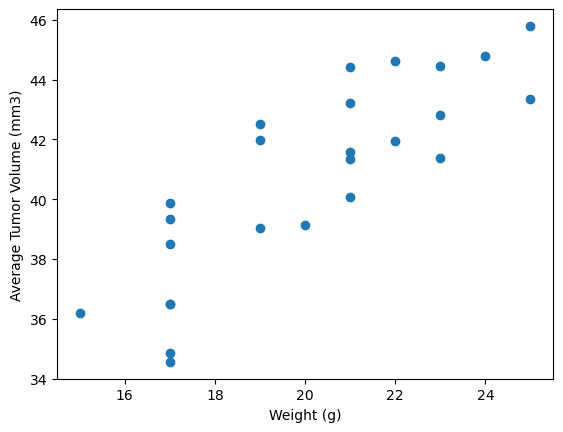

In [76]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen 
Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean()
mice_weight_avg = Capomulin_gp['Weight (g)']
mice_tumor_avg = Capomulin_gp['Tumor Volume (mm3)']

# Generate a scatter plot
plt.scatter(mice_weight_avg, mice_tumor_avg)
# Set x/y label, title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# Present the box plot chart
plt.show()

# To close pyplot
plt.close()


In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

The correlation between mouse weight and tumor vol is 0.84


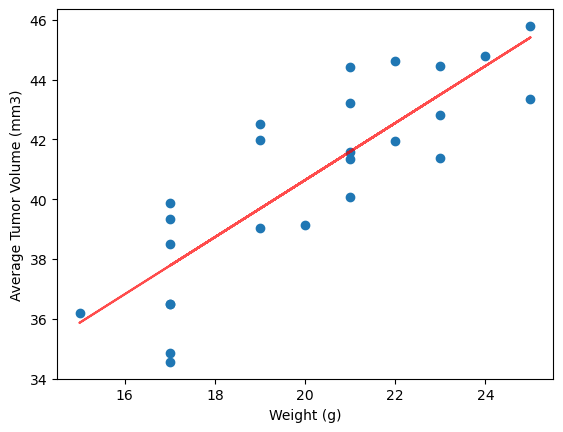

In [130]:
#Create a dataframe drived from the previous data
capomulin_regimen_df = mouse_data_complete.loc[mouse_data_complete['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_regimen_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_regimen_df, avg_vol_df, on='Mouse ID')
final_data = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()

mice_weight_avg= final_data['Weight (g)']
tumor_avg= final_data['avg_tumor_vol']

# Define x,y values
x_values = mice_weight_avg
y_values = tumor_avg

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)
#print(f"The r-squared is: {r_squared}")

# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
#plt.annotate(line_eq,(20,37), fontsize=11, color="red")
#plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")

# Define title and x/y labels
#plt.title('The correlation between mouse weight and the average tumor volume is'+ {correlation})
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Save box plot graph to Images folder
#plt.savefig('images/scatter_weight_tumor_linear.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()